In [1]:
from sstadex import Macromodel, Primitive, dfs, simplediffpair, cs_pmos, cm_pmos, spice_sim
import numpy as np
from sympy import Symbol
from sympy.solvers import solve
import matplotlib.pyplot as plt
import paretoset as pareto
import pandas as pd
from sympy import lambdify
import matplotlib.ticker as ticker

In [2]:
from sstadex import Transistor
import seaborn as sns
sns.set_theme()
sns.color_palette("mako")

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [3]:
lengths = [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6]

# gmid

length
vgs
0


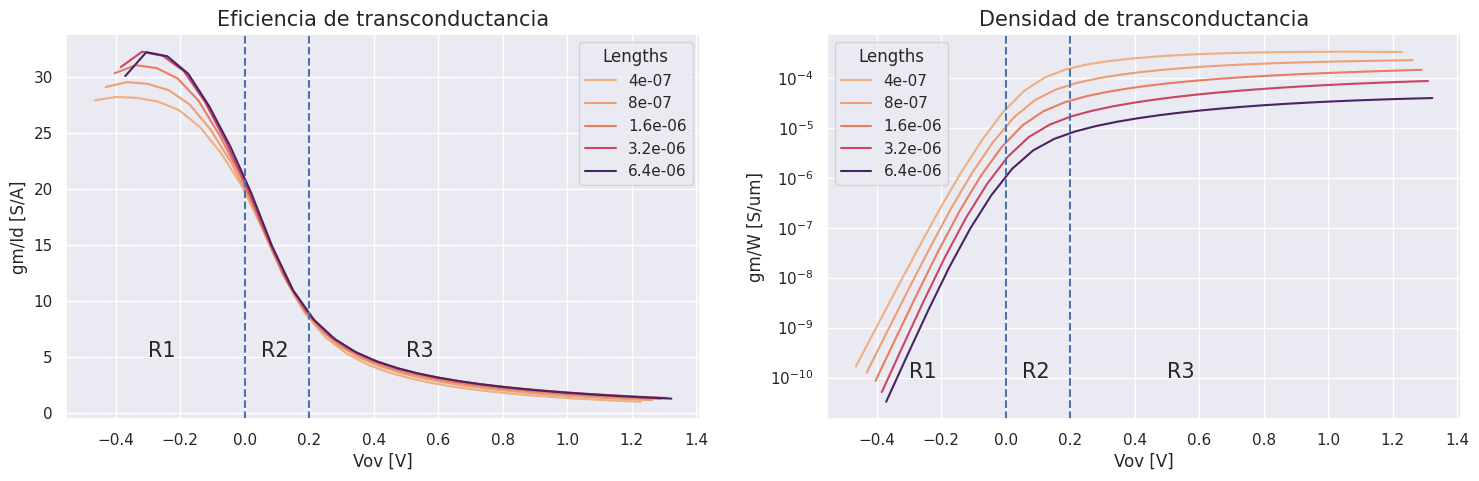

In [4]:
vgs_explore = np.linspace(0.06, 2.6, 40)

sky_transistor = Transistor(
            "../../LUTs/sky130A_LUT_01v8.npy",
            "nmos",
            0,
            2,
            (0, 3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict_1 = {}
dict_1["vgs"]=np.tile(vgs_explore, 5)
dict_1["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict_1["gmid"]=sky_transistor.gmid.flatten()
dict_1["gds"]=sky_transistor.gds.flatten()
dict_1["jd"]=sky_transistor.jd.flatten()/1e6
dict_1["vov"]=dict_1["vgs"]-sky_transistor.vth.flatten()
dict_1["gmd"]=dict_1["gmid"]*dict_1["jd"]
dict_1["gdsid"]=dict_1["gds"]/sky_transistor.id.flatten()
dict_1["gain"]=20*np.log10(dict_1["gmid"]/dict_1["gdsid"])
dict_1["fT"]=((dict_1["gmid"]*sky_transistor.id.flatten())/sky_transistor.cgg.flatten())/(2e9*np.pi)


df_sky = pd.DataFrame.from_dict(dict_1)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.lineplot(ax=axs[0], data=df_sky, x="vov", y="gmid", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_sky, x="vov", y="gmd", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Eficiencia de transconductancia", fontsize=15)
axs[0].set_xlabel(r"Vov [V]")
axs[0].set_ylabel(r"gm/Id [S/A]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"Vov [V]")
axs[1].set_ylabel(r"gm/W [S/um]")
axs[1].set_title(r"Densidad de transconductancia", fontsize=15)
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
#fig.suptitle(r"Sky130A: nmos_01v8", fontsize=24, y=1.1)

axs[0].axvline(x = 0, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].axvline(x = 0.2, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].text(-0.3, 5, "R1", size=15)
axs[0].text(0.05, 5, "R2", size=15)
axs[0].text(0.5, 5, "R3", size=15)

axs[1].axvline(x = 0, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].axvline(x = 0.2, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].set_yscale("log")
axs[1].text(-0.3, 1e-10, "R1", size=15)
axs[1].text(0.05, 1e-10, "R2", size=15)
axs[1].text(0.5, 1e-10, "R3", size=15)


plt.savefig('sd_sky1.svg', format='svg', dpi=1200)

length
vgs
0


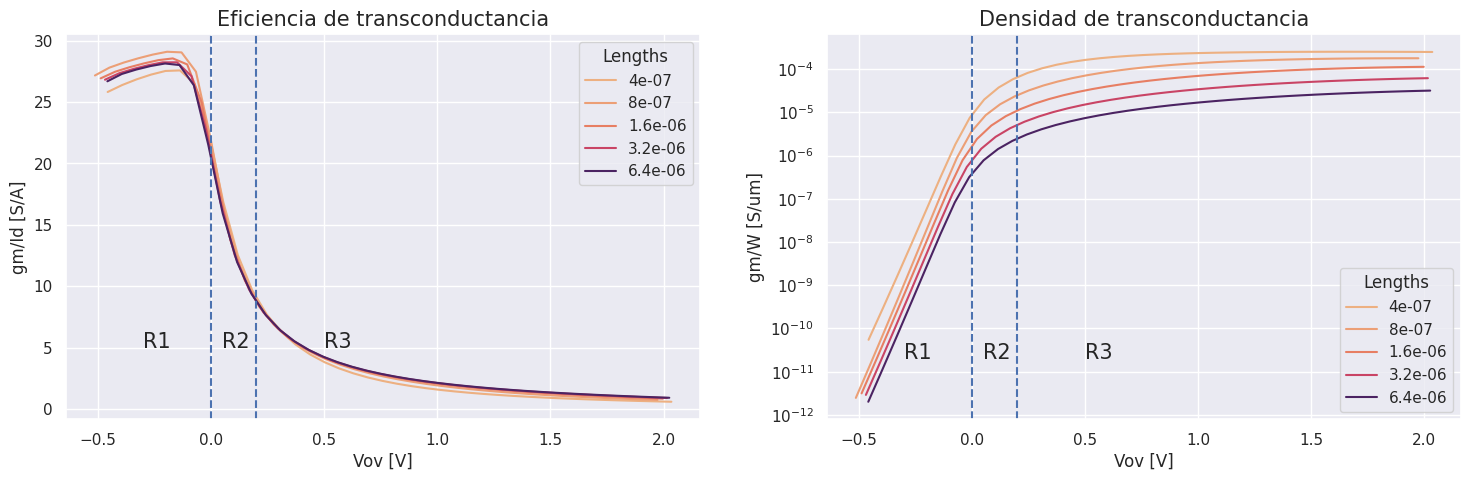

In [5]:
vgs_explore = np.linspace(0.1, 2.6, 40)

ihp_transistor = Transistor(
            "../../LUTs/IHP_LUT_hv_20w.npy",
            "nmos",
            0,
            2,
            (0, 3.3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=ihp_transistor.gmid.flatten()
dict["gds"]=ihp_transistor.gds.flatten()
dict["jd"]=ihp_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-ihp_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gdsid"]=dict["gds"]/ihp_transistor.id.flatten()
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])
dict["fT"]=((dict["gmid"]*ihp_transistor.id.flatten())/ihp_transistor.cgg.flatten())/(2e9*np.pi)

df_ihp = pd.DataFrame.from_dict(dict)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.lineplot(ax=axs[0], data=df_ihp, x="vov", y="gmid", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_ihp, x="vov", y="gmd", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Eficiencia de transconductancia", fontsize=15)
axs[0].set_xlabel(r"Vov [V]")
axs[0].set_ylabel(r"gm/Id [S/A]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"Vov [V]")
axs[1].set_ylabel(r"gm/W [S/um]")
axs[1].set_title(r"Densidad de transconductancia", fontsize=15)
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
#fig.suptitle(r"IHP-sg13g2: hv_nmos", fontsize=24, y=1.1)

axs[1].set_yscale("log")

axs[0].axvline(x = 0, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].axvline(x = 0.2, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].text(-0.3, 5, "R1", size=15)
axs[0].text(0.05, 5, "R2", size=15)
axs[0].text(0.5, 5, "R3", size=15)

axs[1].axvline(x = 0, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].axvline(x = 0.2, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].set_yscale("log")
axs[1].text(-0.3, 2e-11, "R1", size=15)
axs[1].text(0.05, 2e-11, "R2", size=15)
axs[1].text(0.5, 2e-11, "R3", size=15)

plt.savefig('sd_ihp1.svg', format='svg', dpi=1200)

length
vgs
0


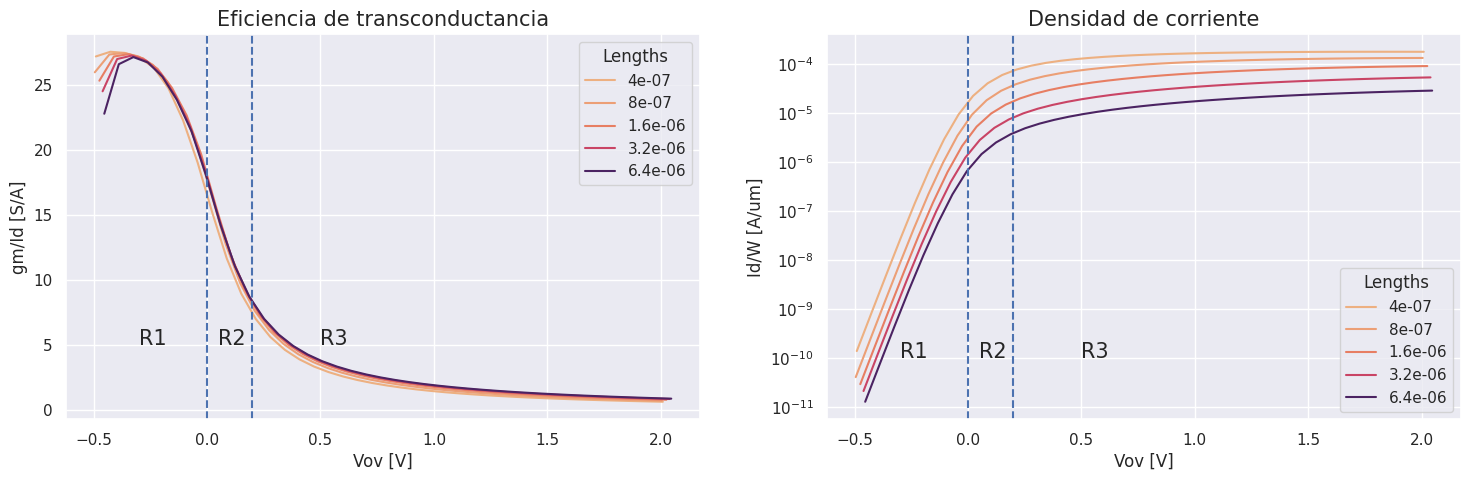

In [6]:
vgs_explore = np.linspace(0.2, 2.7, 40)

gf_transistor = Transistor(
            "../../LUTs/gf_LUT_03v3.npy",
            "nmos",
            0,
            2,
            (0, 3.3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=gf_transistor.gmid.flatten()
dict["gds"]=gf_transistor.gds.flatten()
dict["jd"]=gf_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-gf_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gdsid"]=dict["gds"]/gf_transistor.id.flatten()
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])
dict["fT"]=((dict["gmid"]*gf_transistor.id.flatten())/gf_transistor.cgg.flatten())/(2e9*np.pi)

df_gf = pd.DataFrame.from_dict(dict)

fig, axs = plt.subplots(1, 2, figsize=(18, 5))
sns.lineplot(ax=axs[0], data=df_gf, x="vov", y="gmid", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_gf, x="vov", y="gmd", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Eficiencia de transconductancia", fontsize=15)
axs[0].set_xlabel(r"Vov [V]")
axs[0].set_ylabel(r"gm/Id [S/A]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"Vov [V]")
axs[1].set_ylabel(r"Id/W [A/um]")
axs[1].set_title(r"Densidad de corriente", fontsize=15)
axs[1].ticklabel_format(style='sci', axis='y', scilimits=(0, 0), useMathText=True)
#fig.suptitle(r"GF180mcuD: nmos_03v3", fontsize=24, y=1.1)

axs[0].axvline(x = 0, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].axvline(x = 0.2, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].text(-0.3, 5, "R1", size=15)
axs[0].text(0.05, 5, "R2", size=15)
axs[0].text(0.5, 5, "R3", size=15)

axs[1].axvline(x = 0, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].axvline(x = 0.2, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].set_yscale("log")
axs[1].text(-0.3, 1e-10, "R1", size=15)
axs[1].text(0.05, 1e-10, "R2", size=15)
axs[1].text(0.5, 1e-10, "R3", size=15)

plt.savefig('sd_gf1.svg', format='svg', dpi=1200)

In [7]:
df_ihp["vov"].values

array([-0.45669305, -0.39276029, -0.32884446, -0.26493976, -0.20104227,
       -0.13714956, -0.07326004, -0.00937275,  0.05451297,  0.11839758,
        0.18228128,  0.24616442,  0.31004713,  0.37392944,  0.43781162,
        0.50169362,  0.56557547,  0.62945731,  0.69333913,  0.75722086,
        0.82110266,  0.8849845 ,  0.94886646,  1.01274845,  1.07663053,
        1.14051269,  1.20439497,  1.26827736,  1.33215985,  1.39604247,
        1.45992527,  1.52380811,  1.5876911 ,  1.65157422,  1.71545753,
        1.77934095,  1.84322452,  1.90710824,  1.97099206,  2.03487608,
       -0.51282958, -0.44900584, -0.38520988, -0.32143222, -0.25766643,
       -0.1939083 , -0.13015563, -0.06640657, -0.00266011,  0.06108461,
        0.12482778,  0.18857012,  0.25231165,  0.31605259,  0.37979322,
        0.44353352,  0.50727373,  0.57101396,  0.63475414,  0.69849403,
        0.76223414,  0.82597421,  0.88971458,  0.95345499,  1.01719534,
        1.08093619,  1.14467675,  1.20841805,  1.27215925,  1.33

In [8]:
df_ihp['gf_gmid_error'] = ((df_ihp["gmid"]-df_gf["gmid"])/df_ihp["gmid"])*100
df_ihp['sky_gmid_error'] = ((df_ihp["gmid"]-df_sky["gmid"])/df_ihp["gmid"])*100

df_ihp['gf_gmd_error'] = ((df_ihp["gmd"]-df_gf["gmd"]))
df_ihp['sky_gmd_error'] = ((df_ihp["gmd"]-df_sky["gmd"]))

In [9]:
df_ihp

,vgs,Lengths,gmid,gds,jd,vov,gmd,gdsid,gain,fT,gf_gmid_error,sky_gmid_error,gf_gmd_error,sky_gmd_error
0,0.100000,4.000000e-07,25.817899,2.707894e-11,2.119651e-12,-0.456693,5.472494e-11,0.638759,32.131672,0.000026,-5.445453,NaN,-8.553014e-11,NaN
1,0.164103,4.000000e-07,26.381105,1.474880e-10,1.130089e-11,-0.392760,2.981300e-10,0.652550,32.133582,0.000149,-4.568183,NaN,-5.290342e-10,NaN
2,0.228205,4.000000e-07,26.844714,8.268134e-10,6.225616e-11,-0.328844,1.671249e-09,0.664042,32.133270,0.000876,-2.422718,NaN,-3.154996e-09,NaN
3,0.292308,4.000000e-07,27.231408,4.748324e-09,3.524178e-10,-0.264940,9.596834e-09,0.673678,32.132355,0.005242,0.330477,NaN,-1.790643e-08,NaN
4,0.356410,4.000000e-07,27.528188,2.778654e-08,2.039640e-09,-0.201042,5.614760e-08,0.681163,32.130533,0.031604,4.326687,NaN,-9.254375e-08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2.343590,6.400000e-06,1.121461,2.616260e-06,2.598125e-05,1.770887,2.913695e-05,0.005035,46.955866,0.226080,11.667394,20.773003,1.971285e-06,-0.000012
196,2.407692,6.400000e-06,1.072323,3.264322e-06,2.787339e-05,1.834559,2.988929e-05,0.005856,45.255053,0.231338,11.344125,21.016021,2.145583e-06,-0.000012
197,2.471795,6.400000e-06,1.026059,4.118033e-06,2.981210e-05,1.898232,3.058898e-05,0.006907,43.438102,0.236103,10.992622,21.307691,2.296584e-06,-0.000011
198,2.535897,6.400000e-06,0.982347,5.236493e-06,3.179388e-05,1.961905,3.123263e-05,0.008235,41.531962,0.240353,10.612027,21.697123,2.422460e-06,-0.000011


<Axes: xlabel='vov', ylabel='gf_gmid_error'>

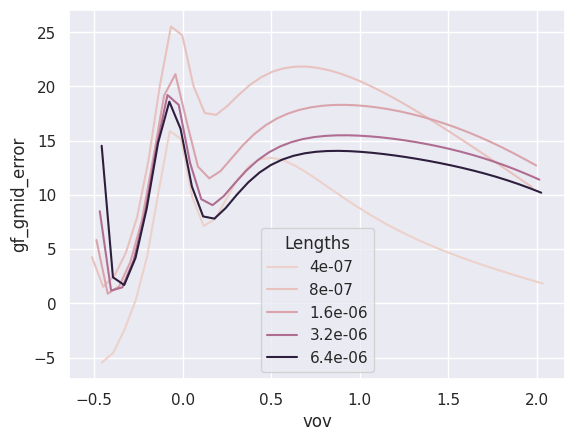

In [10]:
sns.lineplot(data=df_ihp, x="vov", y='gf_gmid_error', hue='Lengths')


<Axes: xlabel='vov', ylabel='gf_gmd_error'>

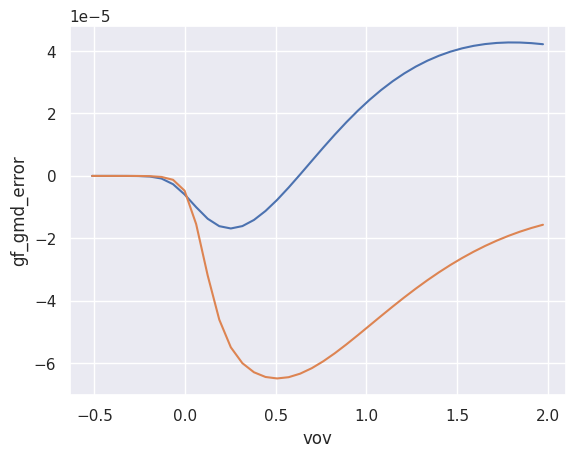

In [11]:
sns.lineplot(data=df_ihp[df_ihp['Lengths']==0.8e-6], x="vov", y='gf_gmd_error')
sns.lineplot(data=df_ihp[df_ihp['Lengths']==0.8e-6], x="vov", y='sky_gmd_error')


<Axes: xlabel='vov', ylabel='gmd'>

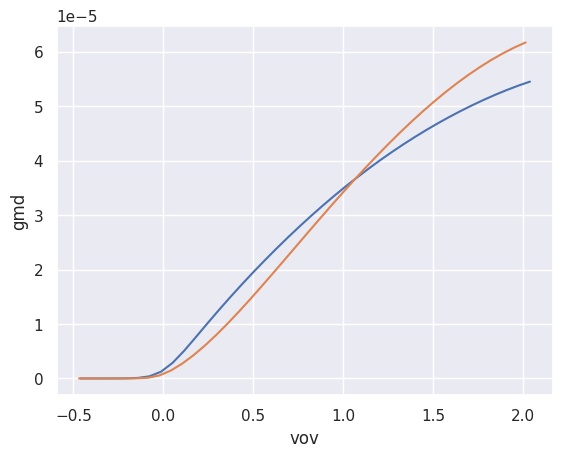

In [12]:
sns.lineplot(data=df_gf[df_gf['Lengths']==3.2e-6], x="vov", y="gmd")
sns.lineplot(data=df_ihp[df_ihp['Lengths']==3.2e-6], x="vov", y="gmd")

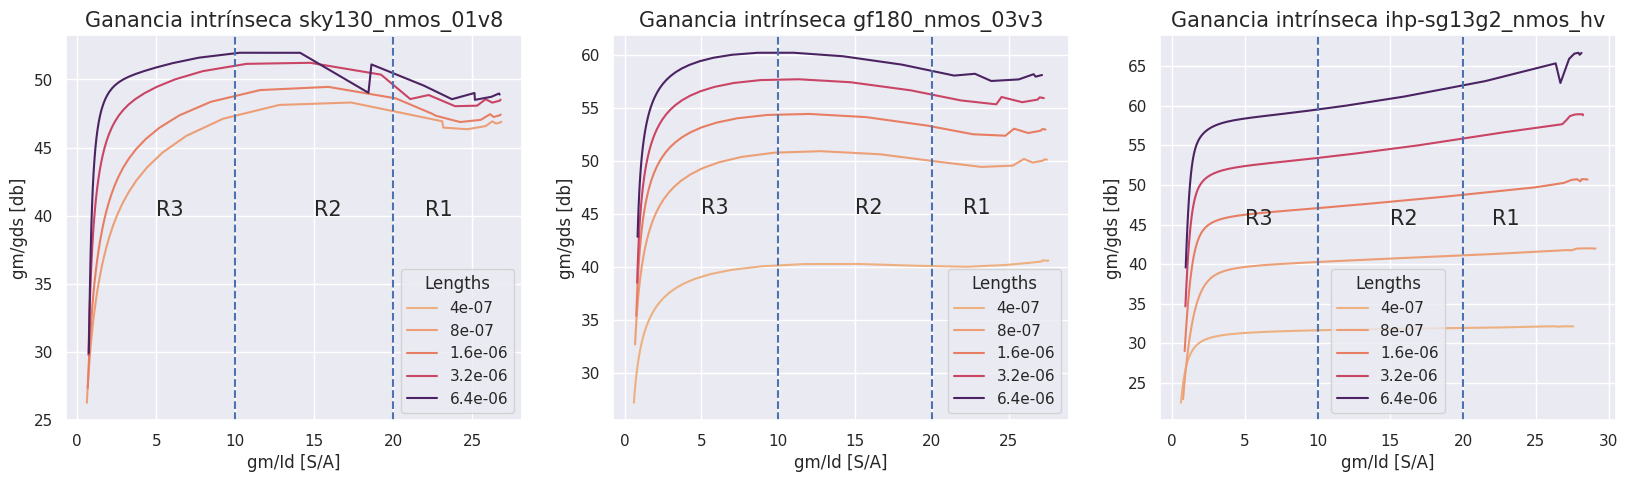

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(ax=axs[0], data=df_sky, x="gmid", y="gain", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_gf, x="gmid", y="gain", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[2], data=df_ihp, x="gmid", y="gain", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Ganancia intrínseca sky130_nmos_01v8", fontsize=15)
axs[0].set_xlabel(r"gm/Id [S/A]")
axs[0].set_ylabel(r"gm/gds [db]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"gm/Id [S/A]")
axs[1].set_ylabel(r"gm/gds [db]")
axs[1].set_title(r"Ganancia intrínseca gf180_nmos_03v3", fontsize=15)
axs[2].locator_params(axis='both', nbins=10) 
axs[2].set_title(r"Ganancia intrínseca ihp-sg13g2_nmos_hv", fontsize=15)
axs[2].set_xlabel(r"gm/Id [S/A]")
axs[2].set_ylabel(r"gm/gds [db]")
#fig.suptitle(r"Ganancias intrínsecas", fontsize=24, y=1.1)

axs[0].axvline(x = 10, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].axvline(x = 20, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].text(5, 40, "R3", size=15)
axs[0].text(15, 40, "R2", size=15)
axs[0].text(22, 40, "R1", size=15)

axs[1].axvline(x = 10, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].axvline(x = 20, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].text(5, 45, "R3", size=15)
axs[1].text(15, 45, "R2", size=15)
axs[1].text(22, 45, "R1", size=15)

axs[2].axvline(x = 10, color = 'b', label = 'axvline - full height', linestyle='--')
axs[2].axvline(x = 20, color = 'b', label = 'axvline - full height', linestyle='--')
axs[2].text(5, 45, "R3", size=15)
axs[2].text(15, 45, "R2", size=15)
axs[2].text(22, 45, "R1", size=15)

plt.savefig('sd_gain.svg', format='svg', dpi=1200)

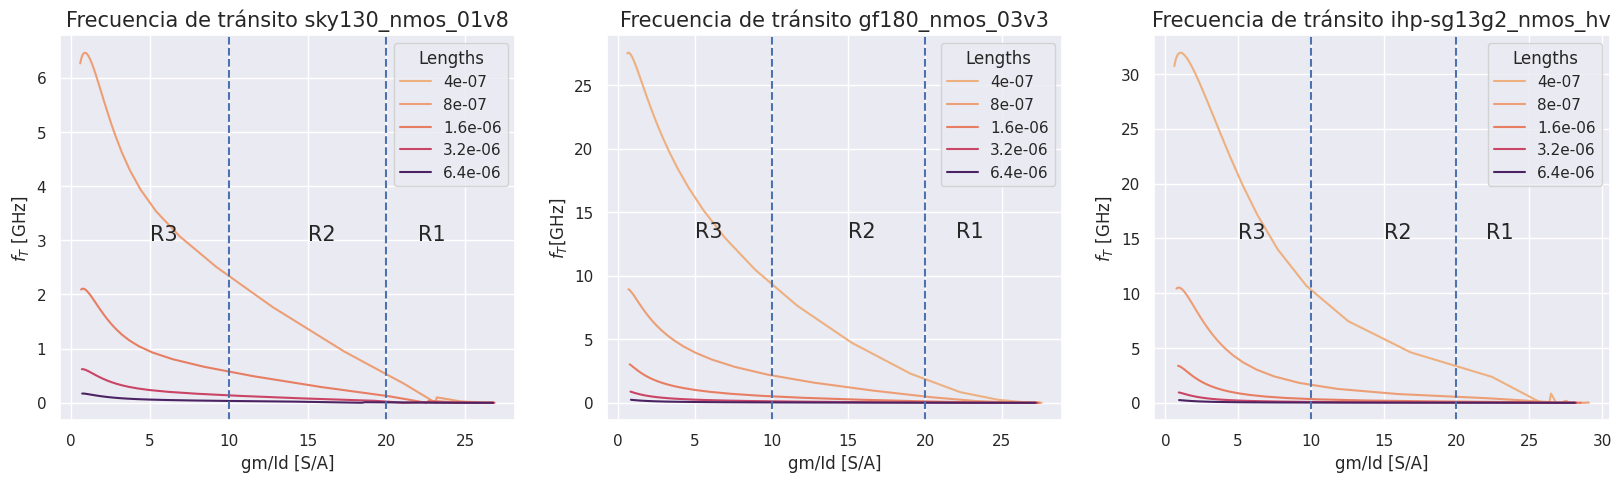

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.lineplot(ax=axs[0], data=df_sky, x="gmid", y="fT", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[1], data=df_gf, x="gmid", y="fT", hue="Lengths", palette="flare")
sns.lineplot(ax=axs[2], data=df_ihp, x="gmid", y="fT", hue="Lengths", palette="flare")

axs[0].locator_params(axis='both', nbins=10) 
axs[0].set_title(r"Frecuencia de tránsito sky130_nmos_01v8", fontsize=15)
axs[0].set_xlabel(r"gm/Id [S/A]")
axs[0].set_ylabel(r"$f_T$ [GHz]")
axs[1].locator_params(axis='both', nbins=10) 
axs[1].set_xlabel(r"gm/Id [S/A]")
axs[1].set_ylabel(r"$f_T$[GHz]")
axs[1].set_title(r"Frecuencia de tránsito gf180_nmos_03v3", fontsize=15)
axs[2].locator_params(axis='both', nbins=10) 
axs[2].set_title(r"Frecuencia de tránsito ihp-sg13g2_nmos_hv", fontsize=15)
axs[2].set_xlabel(r"gm/Id [S/A]")
axs[2].set_ylabel(r"$f_T$ [GHz]")

axs[0].axvline(x = 10, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].axvline(x = 20, color = 'b', label = 'axvline - full height', linestyle='--')
axs[0].text(5, 3, "R3", size=15)
axs[0].text(15, 3, "R2", size=15)
axs[0].text(22, 3, "R1", size=15)

axs[1].axvline(x = 10, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].axvline(x = 20, color = 'b', label = 'axvline - full height', linestyle='--')
axs[1].text(5, 13, "R3", size=15)
axs[1].text(15, 13, "R2", size=15)
axs[1].text(22, 13, "R1", size=15)

axs[2].axvline(x = 10, color = 'b', label = 'axvline - full height', linestyle='--')
axs[2].axvline(x = 20, color = 'b', label = 'axvline - full height', linestyle='--')
axs[2].text(5, 15, "R3", size=15)
axs[2].text(15, 15, "R2", size=15)
axs[2].text(22, 15, "R1", size=15)

plt.savefig('sd_fT.svg', format='svg', dpi=1200)

# Example

Conditions:

1. gain > 40dB
2. Id < 20uA

Optimization:

1. ID, W, L minimize
2. GBW maximize

In [7]:
vgs_explore = np.linspace(0.1, 2.6, 100)

ihp_transistor = Transistor(
            "../../LUTs/IHP_LUT_hv_20w.npy",
            "nmos",
            0,
            1.2,
            (0, 3.3, 0.01),
            [0.4e-06, 0.8e-06, 1.6e-06, 3.2e-06, 6.4e-6],
            ['length', 'vgs'],
            [
                lengths,
                vgs_explore,
            ],
        )

dict = {}
dict["vgs"]=np.tile(vgs_explore, 5)
dict["Lengths"]=np.repeat(lengths, len(vgs_explore))
dict["gmid"]=ihp_transistor.gmid.flatten()
dict["gds"]=ihp_transistor.gds.flatten()
dict["gdsid"]=dict["gds"]/ihp_transistor.id.flatten()
dict["cgg"] = ihp_transistor.cgg.flatten()
dict["cgd"] = np.abs(ihp_transistor.cgd.flatten())
dict["jd"]=ihp_transistor.jd.flatten()/1e6
dict["vov"]=dict["vgs"]-ihp_transistor.vth.flatten()
dict["gmd"]=dict["gmid"]*dict["jd"]
dict["gain"]=20*np.log10(dict["gmid"]/dict["gdsid"])

df_ihp = pd.DataFrame.from_dict(dict)

length
vgs
0


In [8]:
id_sweep = np.linspace(1e-6, 20e-6, 30)
sweep_size = len(id_sweep)

In [9]:
new_df = df_ihp.copy()
new_df_size = len(new_df)
new_df  

,vgs,Lengths,gmid,gds,gdsid,cgg,cgd,jd,vov,gmd,gain
0,0.100000,4.000000e-07,25.623128,1.618595e-11,0.635355,6.827132e-15,1.655289e-16,1.273773e-12,-0.476225,3.263805e-11,32.112317
1,0.125253,4.000000e-07,25.873968,3.131007e-11,0.641454,6.676453e-15,1.617651e-16,2.440554e-12,-0.451037,6.314681e-11,32.113948
2,0.150505,4.000000e-07,26.103993,6.088662e-11,0.647093,6.535514e-15,1.582427e-16,4.704625e-12,-0.425852,1.228095e-10,32.114804
3,0.175758,4.000000e-07,26.316295,1.189793e-10,0.652324,6.405175e-15,1.549842e-16,9.119648e-12,-0.400670,2.399953e-10,32.115226
4,0.201010,4.000000e-07,26.513185,2.335598e-10,0.657188,6.281400e-15,1.518894e-16,1.776962e-11,-0.375490,4.711292e-10,32.115441
...,...,...,...,...,...,...,...,...,...,...,...
495,2.498990,6.400000e-06,0.882846,1.110734e-04,0.188805,4.672734e-13,7.686910e-14,2.941480e-05,1.924909,2.596874e-05,13.397413
496,2.524242,6.400000e-06,0.859752,1.205485e-04,0.200452,4.699636e-13,8.094374e-14,3.006920e-05,1.949992,2.585206e-05,12.647269
497,2.549495,6.400000e-06,0.837131,1.303825e-04,0.212208,4.725759e-13,8.495117e-14,3.072042e-05,1.975076,2.571703e-05,11.920627
498,2.574747,6.400000e-06,0.814991,1.405521e-04,0.224037,4.751721e-13,8.898361e-14,3.136800e-05,2.000159,2.556462e-05,11.216643


In [10]:
dict = {}

dict["gm"] = np.dot(new_df["gmid"].values.reshape(new_df_size,1), id_sweep.reshape(1,sweep_size)).flatten()
dict["gds_2"] = np.repeat(new_df["gds"].values, sweep_size).flatten()
dict["gdsid"] = np.repeat(new_df["gdsid"].values, sweep_size).flatten()
dict["gds"] = np.dot(new_df["gdsid"].values.reshape(new_df_size,1), id_sweep.reshape(1,sweep_size)).flatten()
dict["gain"] = 20*np.log10(dict["gm"]/dict["gds"]).flatten()
dict["id"] = np.tile(id_sweep, new_df_size).flatten()*1e6
dict["gmid"] = np.repeat(new_df["gmid"].values, sweep_size).flatten()
dict["W"] = np.dot(1/new_df["jd"].values.reshape(new_df_size,1), id_sweep.reshape(1,sweep_size)).flatten()
dict["L"] = np.repeat(new_df["Lengths"].values, sweep_size).flatten()*1e6
dict["area"] = dict["W"]+dict["L"]
dict["gbw"] = (dict["gm"]/(1e-12*2*np.pi))/1e6
dict["vgs"] = np.repeat(new_df["vgs"].values, sweep_size).flatten()
dict["cgg"] = (np.repeat(new_df["cgg"].values, sweep_size).flatten()*dict["W"])/20
dict["cgd"] = (np.repeat(new_df["cgd"].values, sweep_size).flatten()*dict["W"])/20
dict["fT"] = (dict["gm"]/dict["cgg"])/(2e6*np.pi)

example_df = pd.DataFrame.from_dict(dict)

In [11]:
example_df

,gm,gds_2,gdsid,gds,gain,id,gmid,W,L,area,gbw,vgs,cgg,cgd,fT
0,0.000026,1.618595e-11,0.635355,6.353548e-07,32.112317,1.000000,25.623128,7.850693e+05,0.4,7.850697e+05,4.078047,0.1,2.679886e-10,6.497585e-12,0.015217
1,0.000042,1.618595e-11,0.635355,1.051622e-06,32.112317,1.655172,25.623128,1.299425e+06,0.4,1.299425e+06,6.749872,0.1,4.435673e-10,1.075462e-11,0.015217
2,0.000059,1.618595e-11,0.635355,1.467889e-06,32.112317,2.310345,25.623128,1.813781e+06,0.4,1.813781e+06,9.421696,0.1,6.191461e-10,1.501166e-11,0.015217
3,0.000076,1.618595e-11,0.635355,1.884155e-06,32.112317,2.965517,25.623128,2.328137e+06,0.4,2.328137e+06,12.093520,0.1,7.947248e-10,1.926870e-11,0.015217
4,0.000093,1.618595e-11,0.635355,2.300422e-06,32.112317,3.620690,25.623128,2.842492e+06,0.4,2.842493e+06,14.765344,0.1,9.703035e-10,2.352574e-11,0.015217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.000014,1.510324e-04,0.235903,4.099836e-06,10.534451,17.379310,0.793335,5.429081e-01,6.4,6.942908e+00,2.194366,2.6,1.296748e-14,2.523567e-15,169.220774
14996,0.000014,1.510324e-04,0.235903,4.254393e-06,10.534451,18.034483,0.793335,5.633749e-01,6.4,6.963375e+00,2.277091,2.6,1.345633e-14,2.618702e-15,169.220774
14997,0.000015,1.510324e-04,0.235903,4.408951e-06,10.534451,18.689655,0.793335,5.838416e-01,6.4,6.983842e+00,2.359815,2.6,1.394518e-14,2.713836e-15,169.220774
14998,0.000015,1.510324e-04,0.235903,4.563508e-06,10.534451,19.344828,0.793335,6.043084e-01,6.4,7.004308e+00,2.442539,2.6,1.443404e-14,2.808971e-15,169.220774


In [12]:
mask = (example_df["gbw"]>10) & (example_df["gain"]>40) & (example_df["W"]<10000) & (example_df["cgg"]<1e-13) & (example_df["W"]>5)
mask

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Length: 15000, dtype: bool

In [13]:
dict_aux = {}
dict_aux["id"] = dict["id"][mask]
dict_aux["area"]=dict["area"][mask]
dict_aux["gbw"]=dict["gain"][mask]
pareto_df = pd.DataFrame.from_dict(dict_aux)
mask_pareto = pareto.paretoset(pareto_df, ["min", "min", "max"])

In [15]:
example_df["L"] = np.round(example_df["L"], 1)

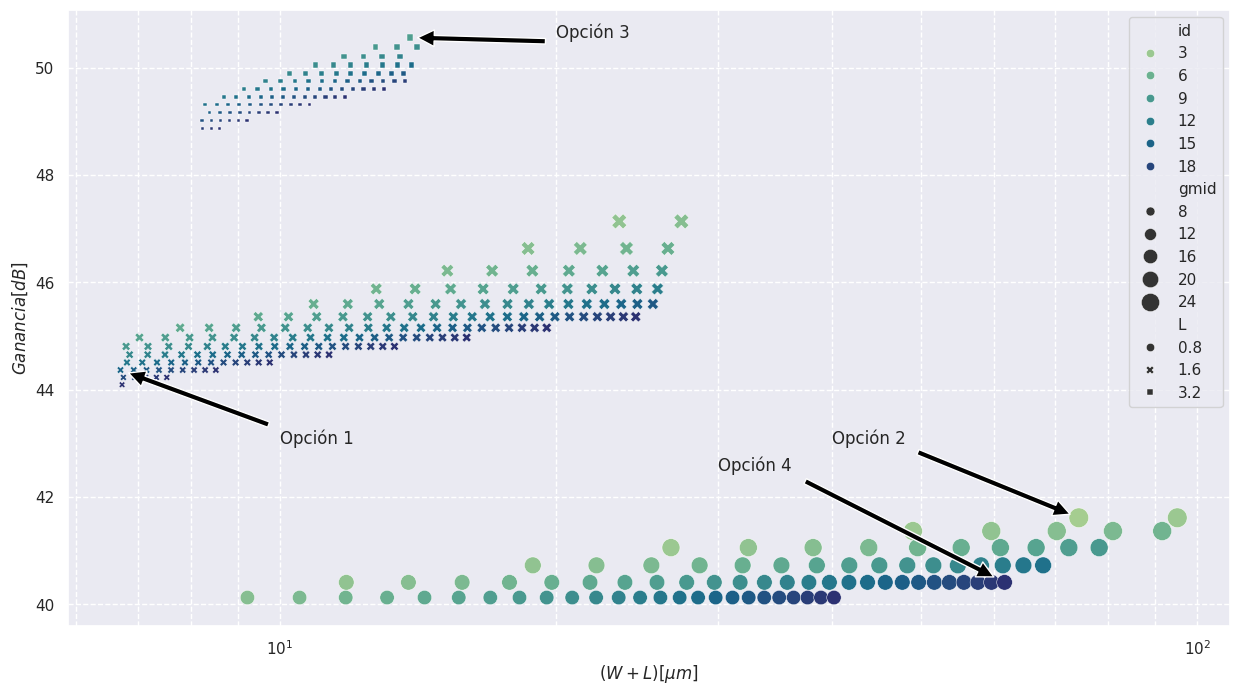

In [16]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=example_df[mask], x="area", y="gain", hue="id", size="gmid", palette="crest", sizes=(10, 200), style="L")
plt.xscale("log")

#plt.set_title(r"Frecuencia de tránsito sky130_nmos_01v8", fontsize=15)
plt.xlabel(r"$(W+L) [\mu m]$")
plt.ylabel(r"$Ganancia [dB]$")
plt.grid(linestyle = "dashed", which="both")

plt.annotate('Opción 3', xy=(13.870535963410601, 50.56050998888213), xytext=(20, 50.56050998888213),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 1', xy=(6.7035395365860335, 44.36513708320553), xytext=(10, 43),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 2', xy=(74.26800691456273, 41.61200406628559), xytext=(40, 43),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 4', xy=(61.64451644208726,40.408423615106585), xytext=(30, 42.5),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.savefig('sd_examplegain.svg', format='svg', dpi=1200)

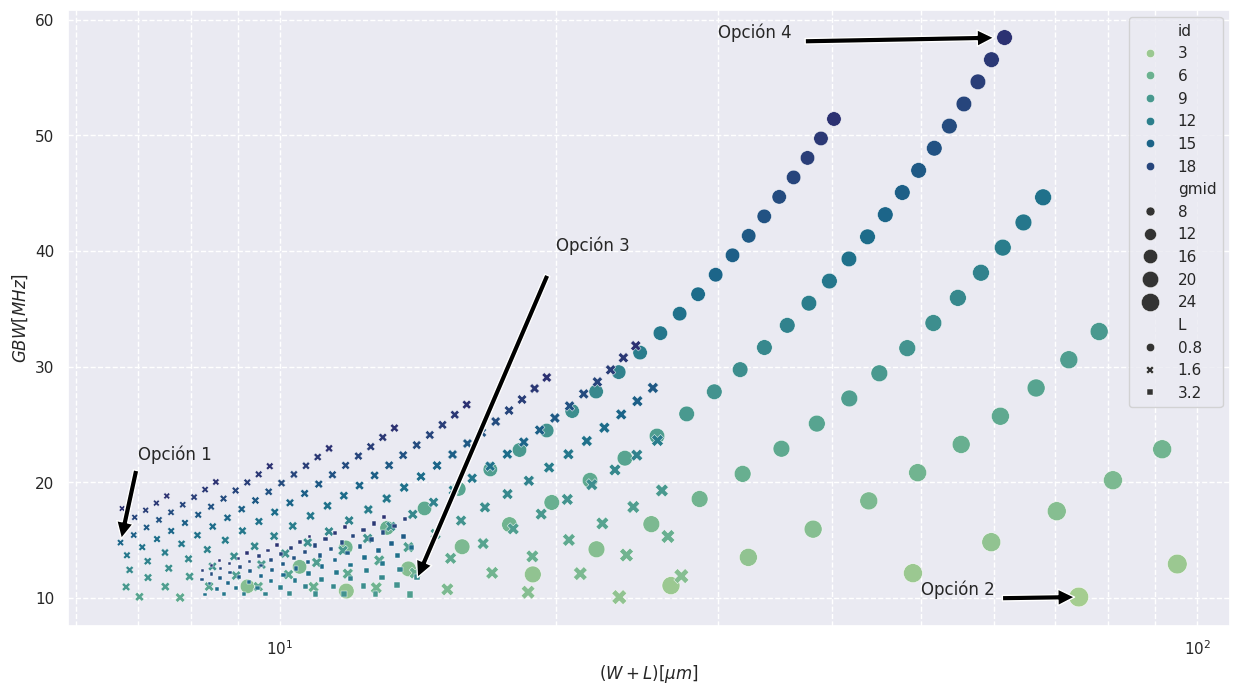

In [17]:
fig, axs = plt.subplots(figsize=(15, 8))
sns.scatterplot(data=example_df[mask], x="area", y="gbw", hue="id", size="gmid", palette="crest", sizes=(10, 200), style="L")
plt.xscale("log")

#plt.set_title(r"Frecuencia de tránsito sky130_nmos_01v8", fontsize=15)
plt.xlabel(r"$(W+L) [\mu m]$")
plt.ylabel(r"$GBW [MHz]$")
plt.grid(linestyle = "dashed", which="both")

plt.annotate('Opción 1', xy=(6.7035395365860335, 14.77228331997086), xytext=(7, 22),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 2', xy=(74.26800691456273, 10.064177644320827), xytext=(50, 10.3),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 3', xy=(13.870535963410601, 10.281892372137587), xytext=(20, 40),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.annotate('Opción 4', xy=(61.64451644208726, 58.466687100722815), xytext=(30, 58.466687100722815),
             arrowprops={"facecolor":'black', "shrink":0.05},
            )

plt.savefig('sd_exampleft.svg', format='svg', dpi=1200)

In [283]:

a = example_df[mask].sort_values(by=["gain"], ascending=False)
a

,gm,gds_2,gdsid,gds,gain,id,gmid,W,L,area,gbw,vgs,cgg,cgd,fT
9851,0.000065,3.589808e-07,0.023337,1.915259e-07,50.560510,8.206897,7.871798,10.670536,3.2,13.870536,10.281892,0.807071,9.627959e-14,9.836433e-17,106.792021
9884,0.000074,4.122695e-07,0.022130,2.251144e-07,50.378544,10.172414,7.309818,10.920743,3.2,14.120743,11.834522,0.832323,9.961190e-14,1.010618e-16,118.806301
9883,0.000070,4.122695e-07,0.022130,2.106155e-07,50.378544,9.517241,7.309818,10.217373,3.2,13.417373,11.072298,0.832323,9.319622e-14,9.455277e-17,118.806301
9882,0.000065,4.122695e-07,0.022130,1.961166e-07,50.378544,8.862069,7.309818,9.514003,3.2,12.714003,10.310075,0.832323,8.678054e-14,8.804370e-17,118.806301
9916,0.000078,4.685244e-07,0.021044,2.416397e-07,50.209717,11.482759,6.817230,10.314926,3.2,13.514926,12.458745,0.857576,9.493091e-14,9.557551e-17,131.240133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,0.000154,1.617603e-06,0.159233,1.515454e-06,40.125215,9.517241,16.154463,18.737036,0.8,19.537036,24.469424,0.680808,3.212844e-14,2.436740e-16,761.612646
3702,0.000143,1.617603e-06,0.159233,1.411130e-06,40.125215,8.862069,16.154463,17.447167,0.8,18.247167,22.784935,0.680808,2.991670e-14,2.268993e-16,761.612646
3701,0.000133,1.617603e-06,0.159233,1.306805e-06,40.125215,8.206897,16.154463,16.157299,0.8,16.957299,21.100445,0.680808,2.770496e-14,2.101246e-16,761.612646
3700,0.000122,1.617603e-06,0.159233,1.202480e-06,40.125215,7.551724,16.154463,14.867430,0.8,15.667430,19.415956,0.680808,2.549322e-14,1.933500e-16,761.612646


In [222]:
20*np.log10(17.3)

np.float64(24.760922062575908)

In [223]:
activeload = Transistor(
            "../../LUTs/IHP_LUT_hv.npy",
            "pmos",
            0,
            -1.3,
            (-3.3, -0.1, 0.01),
            lengths,
            ['length', 'vgs'],
            [
                lengths,
                -1.3,
            ],
        )

length
vgs
0


In [ ]:
W_activeload = 20e-6/activeload.jd
L_activeload = lengths
gmid_activeload = activeload.gmid
gm_activeload = gmid_activeload*20e-6
gds_activeload = (activeload.gds/activeload.id)*20e-6

In [ ]:
print(W_activeload[1])
print(L_activeload[1])
print(gmid_activeload[1])
print(gm_activeload[1])
print(gds_activeload [1])

In [ ]:
cm_transistor = Transistor(
            "../../LUTs/IHP_LUT_hv.npy",
            "nmos",
            0,
            0.8,
            (0.1, 3.3, 0.01),
            lengths,
            ['length', 'vgs'],
            [
                lengths,
                0.8,
            ],
        )

In [ ]:
cm_transistor.gmid

In [ ]:
cm_transistor.gmid*40e-6

In [ ]:
40e-6/cm_transistor.jd

In [ ]:
(cm_transistor.gds/cm_transistor.id)*40e-6

In [ ]:
(1/(gds_activeload[1]+a["gds"].values[0]))*a["gm"].values[0]

In [ ]:
20*np.log10(93.53256349)

In [350]:
sim_1 = pd.read_csv('../sstadex/simulations/sd_example1.csv', sep="\s+", names = ["frec", "gain"])  
sim_2 = pd.read_csv('../sstadex/simulations/sd_example2.csv', sep="\s+", names = ["frec", "gain"])  
sim_3 = pd.read_csv('../sstadex/simulations/sd_example3.csv', sep="\s+", names = ["frec", "gain"])  
sim_4 = pd.read_csv('../sstadex/simulations/sd_example4.csv', sep="\s+", names = ["frec", "gain"])  

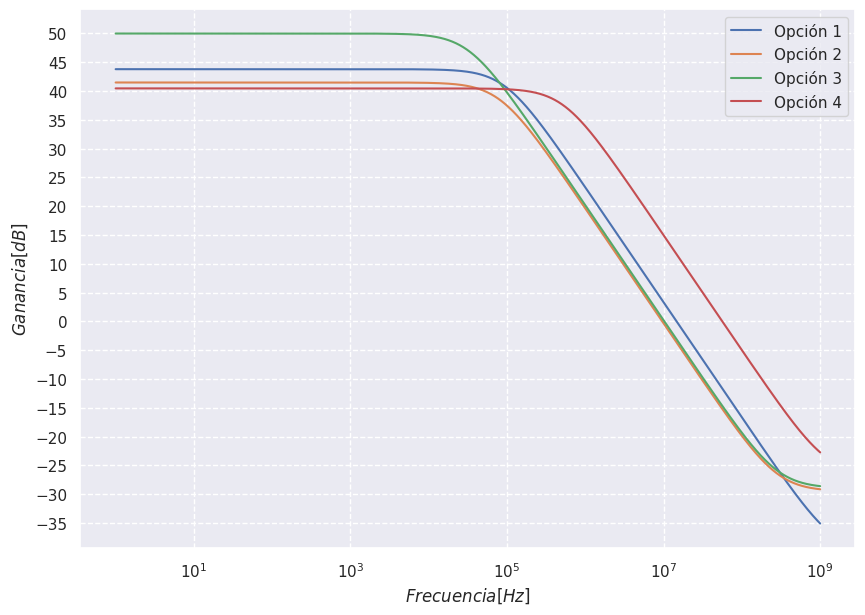

In [351]:
fig, axs = plt.subplots(figsize=(10, 7))

sns.lineplot(data=sim_1, x = "frec", y="gain", label="Opción 1")
sns.lineplot(data=sim_2, x = "frec", y="gain", label="Opción 2")
sns.lineplot(data=sim_3, x = "frec", y="gain", label="Opción 3")
sns.lineplot(data=sim_4, x = "frec", y="gain", label="Opción 4")

plt.xscale("log")

plt.grid(linestyle = "dashed", which="both")
axs.locator_params(axis='y', nbins=20) 

plt.xlabel(r"$Frecuencia [Hz]$")
plt.ylabel(r"$Ganancia [dB]$")


plt.savefig('sd_examplesim.svg', format='svg', dpi=1200)

In [352]:
gbw_error_list = []
for sim in [sim_1, sim_2, sim_3, sim_4]:
    gain = np.abs(sim["gain"])
    argfu = np.argmin(gain)
    fu = sim["frec"][argfu]
    gbw_error_list.append(fu)

In [ ]:
opcion1_gain_error = (np.abs(sim_1["gain"][0]-44.365)/sim_1["gain"][0])*100
opcion2_gain_error = (np.abs(sim_2["gain"][0]-41.612)/sim_2["gain"][0])*100
opcion3_gain_error = (np.abs(sim_3["gain"][0]-50.5605)/sim_3["gain"][0])*100
opcion4_gain_error = (np.abs(sim_4["gain"][0]-40.4084)/sim_4["gain"][0])*100

opcion1_gbw_error = (np.abs(gbw_error_list[0]-14.77228331997086e6)/gbw_error_list[0])*100
opcion2_gbw_error = (np.abs(gbw_error_list[1]-10.064177644320827e6)/gbw_error_list[1])*100
opcion3_gbw_error = (np.abs(gbw_error_list[2]-10.281892372137587e6)/gbw_error_list[2])*100
opcion4_gbw_error = (np.abs(gbw_error_list[3]-58.466687100722815e6)/gbw_error_list[3])*100

In [362]:
print(opcion4_gain_error)
print(opcion4_gbw_error)

0.08101967328820077
4.209781697390547
